<a href="https://colab.research.google.com/github/ShaniYamin/Fashion-MNIST-NN-DL-numpyOnly/blob/main/FashionMNIST_NeuralNetwork_DL_numpy_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First assignment  - Basics of deep learning


---
<br>

### Names
Student 1: Noam Meir 
<br>
Student 2: Shani Yamin 

## Fashion MNIST
Fashion MNIST dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>



Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

<br>

# Goodluck!

#Neural Network in plain NumPy

## Import Libraries

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix


## Load Dataset

In [3]:
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)
print(X.shape, y.shape)

(70000, 784) (70000,)


## Data preprocessing (10%)

### Feature scaling

In [4]:
examples = y.shape[0]
y1 = y.reshape(1, examples)
X1 = X / 255
X1 = X1.T
print(X1.shape)
print(y1.shape) 

(784, 70000)
(1, 70000)


### Select two classes

choose what labels we are going to learn, create a new matrix (X-Data) from all data to the relevant labels,
so the matrix sizes will be (amount of the labels that are relevant, 784 for the pixels in the pictures)
and create new labels matrix that includes only label0,label1. 
At the labels(y)Put 0.0 for label0 and 1.0 for label1, to classify success or failure for our learning.

In [5]:
#TODO: select two classes (for example 2-Pullover and 4-Coat)
labels=[]
matrix=[]
label0='5'
label1='9'
X2=np.transpose(X1)
for i, value in enumerate(y1[0]):
  if value==label0 or value ==label1:
    if value==label0:
      labels.append(0.0)
    else:
      labels.append(1.0)
    row=X2[i,:]
    matrix.append(row)

matrix=np.asarray(matrix)
print(matrix.shape)
labels=np.asarray(labels).reshape(len(labels),1)
print(labels.shape)

(14000, 784)
(14000, 1)


### Split the data into Train set and Test set

Determine X,and Y by the data matrix and labels matrix.
Split the data into Train set and Test set.

In [6]:
# TODO: Split the data into Train set and Test set (The use of libraries other than Numpy is strictly prohibited)

from sklearn.utils import shuffle

X = matrix
Y = labels

# Use shuffle on the train data
X, y = shuffle(X, Y)

split_pct = int(0.7*int(len(X)))
X_train, X_test = np.transpose(X[:split_pct]),np.transpose(X[split_pct:])
Y_train, Y_test = y[:split_pct],y[split_pct:]


### Test yourself

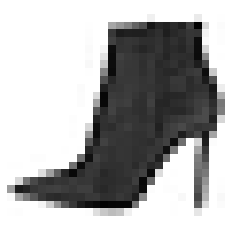

1.0

In [7]:
# Test yourself (Check that the classes you have selected are actually displayed)
%matplotlib inline
from numpy import random

i = random.randint(100)
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[i,0]

## Activation functions (10%)

implement sigmoid function

In [8]:
#TODO: Sigmoid activation function
def sigmoid(z):
  newZ=np.float128(z)
  return 1/(1+np.exp(-newZ))

## Loss function (20%)
BCE Loss function captures the intuition that the neural network should pay a high penalty(Loss→∞) when the estimated probability, with respect to the training example’s label, is completely wrong. On the other hand, the Loss should equal zero(Loss=0) when the estimated probability, with respect to the training example’s label, is correct. Simply put, the BCE Loss should equal zero in only two instances:<br>
* if the example is positively labeled(y=1) the neural network model should be completely sure that the example belongs to the positive class i.e p̂=1.
* if the example is negatively labeled(y=0) the neural network model should be completely sure that the example does not belong to the positive class i.e p̂=0.

<b> When we work with a computer, there are very high values or very low values that it cannot handle and that could cause the system to crash. <br>In order to overcome the case where the function returns values that strive for infinity you will need to understand which range of values causes the logarithm to return inf \ -inf and handle this within the function. </b>

   implement binary cross entropy that compares each of the predicted probabilities to actual class output which can be either 0 or 1.

In [9]:
#TODO: Binary cross entropy
def log_loss(y_hat, Y):
    '''
    Logistic loss, assuming a single value in y_hat and y.
    '''
    return -(Y * np.log(y_hat) + (1 - Y) * (np.log(1 - y_hat))).mean()

## NN Hyper Parameters

choose the variables which determines the network structure(Hidden Layer) 
and the variables which determine how the network is trained(Learning Rate)

In [10]:

input_layer = X_train.shape[0] # 28X28 = 784
print(len(X_train[0]))
hidden_layer = 5 
learning_rate = 0.01 
epochs = 100 

9800


## Weight and Bias Initialization

Initialize the weight and bias 

In [11]:

W1 = np.random.randn(hidden_layer, input_layer)
b1 = np.zeros((hidden_layer, 1))
W2 = np.random.randn(1, hidden_layer)
b2 = np.zeros((1, 1))

print(W1.shape)
# print(W1)
print(b1.shape)
# print(b1)
print(W2.shape)
# print(W2)
print(b2.shape)
# print(b2)
print(X.shape)


(5, 784)
(5, 1)
(1, 5)
(1, 1)
(14000, 784)


## Training (30%)

In [12]:
'''

'''
X = X_train
Y = Y_train
loss_list = []
epoch_list = []

numOfTraining = len(X_train[1])# Write the number of examples in your train set
for i in range(epochs):
  avg_epoch_loss = 0
  for j in range(numOfTraining):
    # TODO :  Forward propagation
    '''
    where input data is fed through a network, in a forward direction, to generate an output
    '''
    X_j = X[:,j].reshape(X[:,j].shape[0],1)
    Z1 = np.dot(W1, X_j) + b1 # DO NOT FORGET TO ADD THE BIAS
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    Yout = int(Y[j])
    

    # TODO: Compute loss
    loss = log_loss( A2, Yout)
    avg_epoch_loss = avg_epoch_loss + loss
    
    # TODO: Back propagation
    '''
    implement the algorithm that is designed to test for errors working back from output nodes to input nodes
    We gave the machine the derivative of the data because we want the weights to change in accordance with the success and the failure.
    '''
    dZ2 = A2 - Yout
    dW2 = np.dot(dZ2, A1.T)
    db2 = dZ2

    dZ1 = A1* (1 - A1)*np.dot(W2.T, dZ2)
    dW1 = np.dot(dZ1, X_j.T)
    db1 = dZ1

    # TODO: Update weights
    '''
    updating the weights according to our feedback from the derivative of the last place in the neural network.
    '''
    W1 = W1 - learning_rate * dW1 
    b1 = b1 - learning_rate * db1 
    W2 = W2 - learning_rate * dW2 
    b2 = b2 - learning_rate * db2 
  avg_epoch_loss = avg_epoch_loss/numOfTraining
  loss_list.append(avg_epoch_loss)
  epoch_list.append(i)
  print("Epoch", i," Loss:", avg_epoch_loss)

Epoch 0  Loss: 0.48255426846650953317
Epoch 1  Loss: 0.27313791676541168457
Epoch 2  Loss: 0.1856241906408749628
Epoch 3  Loss: 0.14955780879789634392
Epoch 4  Loss: 0.13007522148246651989
Epoch 5  Loss: 0.11753578306126458231
Epoch 6  Loss: 0.10819971284794773705
Epoch 7  Loss: 0.10075127892430876499
Epoch 8  Loss: 0.09431914793129136261
Epoch 9  Loss: 0.088860877103060824394
Epoch 10  Loss: 0.08376341731570634529
Epoch 11  Loss: 0.078743254137430705386
Epoch 12  Loss: 0.07424724484779269886
Epoch 13  Loss: 0.07067419896985874739
Epoch 14  Loss: 0.06767069151589585499
Epoch 15  Loss: 0.06491084218929980118
Epoch 16  Loss: 0.06232210986652226731
Epoch 17  Loss: 0.060009997727303644324
Epoch 18  Loss: 0.057987023230864063286
Epoch 19  Loss: 0.056132317633299114587
Epoch 20  Loss: 0.054374253661615410545
Epoch 21  Loss: 0.052704335603384491053
Epoch 22  Loss: 0.051142281071178217142
Epoch 23  Loss: 0.049692263380135317225
Epoch 24  Loss: 0.048327467105320145844
Epoch 25  Loss: 0.04703160

### Loss Visualization

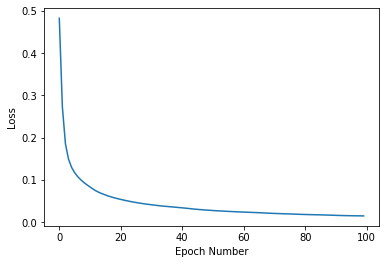

In [13]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(epoch_list, loss_list)

## Results

### Test your performance (30%)

Checking if our train and NN Hyper Parameters are training well and if our accuracy is accurate

In [14]:
#TODO: Forward batch of examples
X = X_test
Y = Y_test

Z1 = np.dot(W1, X) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(W2, A1) + b2
A2 = sigmoid(Z2)


predictions = np.zeros((1,Y.shape[0]))
labels = np.zeros((1,Y.shape[0]))

# Check your predictions against the test's labels
for i in range(Y.shape[0]):
  if (A2[0,i] > 0.5): 
    predictions[0,i] = 1
  labels[0,i] = Y[i,0]

confusion = confusion_matrix(predictions.T, labels.T)
confcalc = (confusion[0,0]+confusion[1,1])/(confusion[0,0]+confusion[0,1]+confusion[1,0]+confusion[1,1])
# Print the confusion matrix In order to test your performance
print(confusion)
print("Accuracy: ",(int(confcalc*10000)/100),"%")

[[2012   39]
 [  58 2091]]
Accuracy:  97.69 %


### Visualize the results

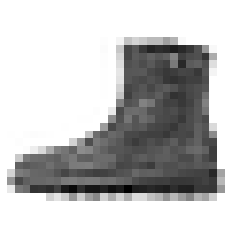

1.0
Real= 1.0 Predicted= [[0.99835294]]


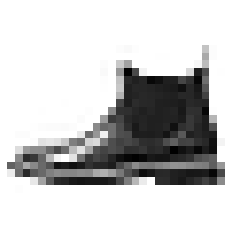

1.0
Real= 1.0 Predicted= [[0.99835289]]


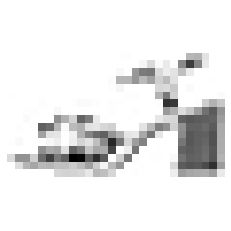

0.0
Real= 0.0 Predicted= [[0.00034348]]


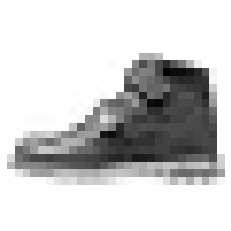

1.0
Real= 1.0 Predicted= [[0.99835248]]


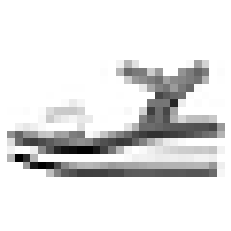

0.0
Real= 0.0 Predicted= [[0.71200268]]


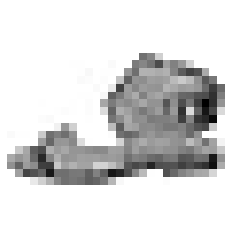

0.0
Real= 0.0 Predicted= [[0.24090304]]


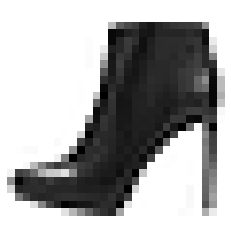

1.0
Real= 1.0 Predicted= [[0.99835272]]


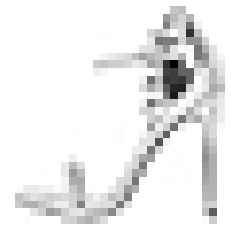

0.0
Real= 0.0 Predicted= [[0.01481946]]


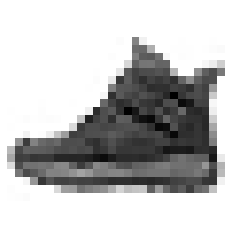

1.0
Real= 1.0 Predicted= [[0.99835295]]


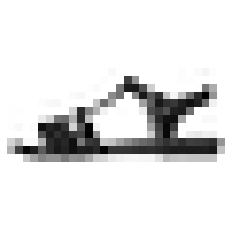

0.0
Real= 0.0 Predicted= [[2.76425382e-06]]


In [19]:
#TODO: SHOW VISUALLY RESULTS ON 10 TEST EXAMPLES
%matplotlib inline
from numpy import random
for j in range(10):
  i = random.randint(2000)
  plt.imshow(X_test[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
  plt.axis("off")
  plt.show()
  Y_test[i,0]


  Z1 = np.dot(W1,X_test[:,i])
  A1 = sigmoid(Z1)
  Z2 = np.dot(W2, A1) + b2
  A2 = sigmoid(Z2)

  Yout = Y[i,0]
  print(Yout)
  print("Real=", Y_test[i,0], "Predicted=",A2)